In [4]:
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = pd.read_csv('synth_data/VitalSigns24Hr.csv')
df['CHARTTIME']= pd.to_datetime(df['CHARTTIME'])
def get_t_seconds(dt):
    return dt.hour*3600 + dt.minute*60 + dt.second
df['t'] = df.apply(lambda row: get_t_seconds(row['CHARTTIME']), axis=1)

In [6]:
all_ids = df['ICUSTAY_ID'].unique()

In [7]:
curr_df = df.loc[df['ICUSTAY_ID']==all_ids[0]]

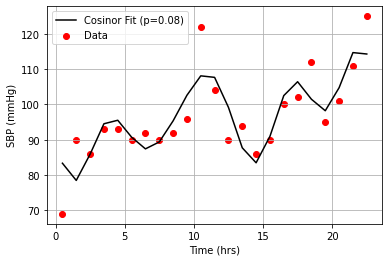

In [10]:
from population_cosinor_rhythmometry.multi_cosinor_model import MultiCosinorModel


csn = MultiCosinorModel(N_components = 5, alpha = 0.1)
csn.fit(curr_df['t'], curr_df['SBP'], remove_outliers = True)
F, p = csn.goodness_of_fit()
csn.plot_cosinor_fit(ylab='SBP (mmHg)')

In [ ]:
# Test residuals here